In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def oscillation(t,S):
    theta = 1.8113*np.pi/180
    f = 1e-4
    N = S*f/np.tan(theta)
    gm = 1/(1+S**2)
    delta = 0.5
    phi = np.pi/2
    lmbd = N**2*np.tan(theta)*gm/(f*np.cos(theta))
    fstar = f*np.cos(theta)*(1+S**2)**(0.5)
    u = delta*lmbd*np.cos(t+phi)
    v = -f*np.cos(theta)*delta*lmbd*np.sin(t+phi)/(fstar)
    b = N**2*np.sin(theta)*delta*lmbd*np.sin(t+phi)/(fstar)
    return [u,v,b]

In [18]:
t = np.linspace(0,2*np.pi,1000)
u, v, b = oscillation(t,1)

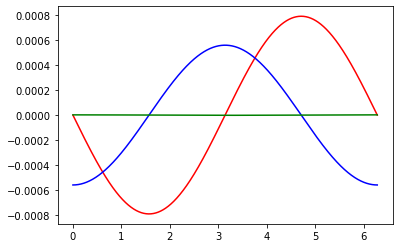

In [19]:
plt.plot(t,u,c="r")
plt.plot(t,v,c="b")
plt.plot(t,b,c="g")

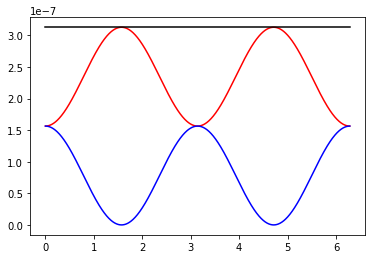

In [22]:
N = 1e-4/np.tan(1.8113*np.pi/180)
plt.plot(t,(u**2+v**2)/2,c="r")
plt.plot(t,b**2/(2*N**2),c="b")
plt.plot(t,(u**2+v**2)/2+b**2/(2*N**2),c="k")

In [ ]:
plt.plot(u,v)
plt.gca().set_aspect("equal")

In [ ]:
plt.plot(u,b)
# plt.gca().set_aspect("equal")

In [ ]:
a = np.max(u)
b = np.max(v)
c = (a**2-b**2)**(0.5)
ecc = c/a

In [ ]:
ecc